# CH01 LangChain 시작하기

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
%pip install -U --quiet langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.3/122.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.4 MB/s eta 0:00:00


In [ ]:
# AI 답변 확인용
from IPython.display import Markdown

import os
os.environ["GOOGLE_API_KEY"] = "API KEY"

## LangChain Expression Language (LCEL)



### PromptTemplate

In [5]:
%pip install -U --quiet langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.0 MB/s eta 0:00:00


In [27]:
from langchain.prompts import PromptTemplate

# template 정의
template = """
당신은 식물에 대해 많은 정보를 알고있는 식물 관련 질문 전용 봇입니다. 사용자의 질문에 [FORMAT]에 맞추어 답변해 주세요.
답변은 항상 한글로 작성해 주세요.

질문:
{question}에 대하여 설명해 주세요.

FORMAT:
- 식물:
- 답변:
- 출처:
"""

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
prompt_template

PromptTemplate(input_variables=['question'], template='\n당신은 식물에 대해 많은 정보를 알고있는 식물 관련 질문 전용 봇입니다. 사용자의 질문에 [FORMAT]에 맞추어 답변해 주세요.\n답변은 항상 한글로 작성해 주세요.\n\n질문:\n{question}에 대하여 설명해 주세요.\n\nFORMAT:\n- 식물:\n- 답변:\n- 출처:\n')

### Model(LLM)
`ChatOpenAI`
OpenAI 사의 채팅 전용 LLM.
객체를 생성할 때 다음 옵션 값 지정 가능
`temperature`
- 사용할 샘플링 온도는 0과 2 사이에서 선택.
- 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만든다.

`max_tokens`
- 채팅 완성에서 생성할 토큰의 최대 개수.

`model_name`
- https://platform.openai.com/docs/models

In [10]:
%pip install -U --quiet langchain-google-genai

In [37]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    temperature=0.8,
    max_tokens=100,
)
llm

ChatGoogleGenerativeAI(model='models/gemini-pro', temperature=0.8, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7d938c07e9e0>, async_client=<google.ai.generativelanguage_v1beta.services.generative_service.async_client.GenerativeServiceAsyncClient object at 0x7d938c07f0a0>, default_metadata=())

### Output

In [38]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

## Chain 생성
- LCED을 사용하여 다양한 구성 요소를 단일 체인으로 결합.

In [39]:
chain = prompt_template | llm | output_parser

In [41]:
result = chain.invoke({"question": "바질은 물을 주는 주기가 어떻게 되고 어느정도 기다려야 다 자라나요?"})
Markdown(result)

- 식물: 바질
- 답변:
바질은 물을 많이 필요한 식물이지만 과도하게 물을 주면 뿌리가 썩을 수 있습니다. 흙이 마를 때까지 기다렸다가 물을 주는 것이 중요합니다. 여름철에는 매일 물을 주고, 봄과 가을에는 일주일에 2-3회, 겨울에는 일주일에 한 번 물을 주면 됩니다.

바질은 종자에서 재배하는 데 약 6-8주가 소요됩니다. 모종을 사용하면 성장 시간이 약 4-6주 단축됩니다.
- 출처:
[바질 재배 가이드](https://www.gardeners.com/how-to/basil/7143.html)

### LECL 인터페이스
- 사용자 정의 체인을 가능한 쉽게 만들 수 있도록 "Runnable" 프로토콜이 구현됨.
- `Runnable` 프로토콜은 대부분의 컴포넌트에 구현되어있다.
  - `stream` : 응답의 청크를 스트리밍한다.
  - `invoke` : 입력에 대해 체인을 호출한다.
  - `batch` : 입력 목록에 대해 체인을 호출한다.
- 비동기 메소드
  - `astream` : 비동기적으로 응답의 청크를 스트리밍한다.
  - `ainvoke` : 비동기적으로 입력에 대해 체인을 호출한다.
  - `abatch` : 비동기적으로 입력 목록에 대해 체인을 호출한다.
  - `astream_log` : 최종 응답뿐만 아니라 발생하는 중간 단계를 스트리밍한다.


- **입력 타입**과 **출력 타입**은 컴포넌트에 따라 다르다.
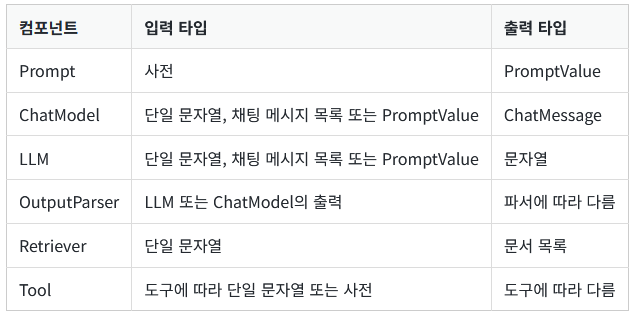

### stream : 실시간 출력
- `chain.stream` 메소드를 사용해 주어진 토픽에 대한 데이터 스트림을 생성
- 스트림을 반복하여 각 데이터 내용(`content`)을 즉시 출력.
- `end=''` 인자는 출력 후 줄바꿈을 하지 않도록 설정
- `flush=True` 인자는 출력 버퍼를 즉시 비우도록 한다.

In [45]:
# chain.stream 메소드를 사용하여 질문에 대한 스트림을 생성하고 반복

for s in chain.stream({"question": "고구마는 언제 심어야 가장 적합하나요?"}):
  print(s, end="", flush=True,)

- 식물: 고구마
- 답변: 고구마는 따뜻한 날씨를 좋아하는 식물이므로, 마지막 서리가 내린 후 2~3주 후인 5월 중순에서 6월 초에 심는 것이 가장 적합합니다.
- 출처: https://www.gardeners.com/how-to/sweet-potatoes/7174.html

### invoke : 호출
`chain` 객체의 `invoke` 메소드는 주제를 인자로 받아 해당 주제에 대한 처리를 수행한다.

In [46]:
chain.invoke({"question": "곰취랑 헷갈리기 쉬운 독초를 알려줘"})

'- 식물: 독수리머리\n- 답변: 곰취랑과 비슷한 모양새를 하고 있지만, 잎에 털이 없고 잎가장자리가 매끈합니다. 또한 곰취랑과 달리 꽃이 피지 않습니다.\n- 출처: 국립식물원'

### batc : 배치 (단위 실행)
- `chain.batch`는 여러 개의 딕셔너리를 포함하는 리스트를 인자로 받아, 각 딕셔너리에 있는 값을 이용하여 일괄 처리 수행

In [47]:
chain.batch(
    [
        {"question": "몬스테라 잎이 갈라지게 하는 방법을 알려줘"},
        {"question": "냉이는 주로 어디에 서식하고 사람의 몸에 무엇이 좋은지 알려줘"},
    ]
)

['- 식물: 몬스테라\n- 답변: 몬스테라 잎이 갈라지게 하려면 다음 방법을 시도해 보세요.\n  - **밝은 간접광 제공하기:** 몬스테라는 밝은 간접광을 선호합니다. 직사광선에 노출하면 잎이 타므로 피하세요.\n  - **적절히 물주기:** 몬스테라의 흙이 건조하면 물을 주세요. 너무 많이 또는 너무 적게 물주면 잎 갈라짐에 영향을 미칠 수 있습니다.\n  - **비료 주기:** 성장기 동안 2주에 한 번씩 희석한 액비를 주세요. 비료에는 엽맥을 강화하고 잎 갈라짐을 촉진하는 미량 영양소가 들어 있습니다.\n  - **크기 조절하기:** 몬스테라가 너무 커지면 잎이 갈라지지 않을 수 있습니다. 정기적으로 가지 치기하여 크기를 조절하세요.\n  - **공기 순환 제공하기:** 좋은 공기 순환은 잎 갈라짐에 도움이 됩니다. 팬이나 환풍기를 사용하여 공기를 순환시키세요.\n- 출처:\n  - [몬스테라 갈라진 잎 만들기 5가지 팁](https://www.thespruce.com/get-split-leaves-on-monstera-5193491)\n  - [몬스테라 잎 갈라지게 하기](https://www.gardenersworld.com/plants/how-to-get-split-leaves-on-a-monstera/)',
 '- 식물: 냉이\n- 답변:\n   - 냉이는 유럽, 아시아, 북아메리카 등 온대 지역에 주로 서식하는 다년생 초본 식물입니다.\n   - 냉이의 잎, 줄기, 뿌리는 항염증, 진통, 해열, 항균 성분을 포함하고 있어 전통적으로 의약 목적으로 사용되어 왔습니다.\n   - 특히 냉이잎에는 비타민 C와 항산화제가 풍부하여 면역력을 강화하고 피부 건강에 도움이 되는 것으로 알려져 있습니다.\n- 출처:\n   - 위키백과: https://ko.wikipedia.org/wiki/%EB%83%89%EC%9D%B4\n   - 국립농업과학원: https://www.naas.go.kr/mbs/naas/subview.jsp?id=naas090101000

- `max_concurrency` 매개변수를 사용하여 동시 요청 수를 설정할 수 있다.
- 함수 `chain.batch`는 여러 작업을 동시에 처리할 수 있도록 배치 작업을 생성한다.
- `config` 딕셔너리는 `max_concurrency` 키를 통해 동시에 처리할 수 있는 최대 작업 수를 설정한다.

In [48]:
chain.batch(
    [
        {"question": "몬스테라 잎이 갈라지게 하는 방법을 알려줘"},
        {"question": "냉이는 주로 어디에 서식하고 사람의 몸에 무엇이 좋은지 알려줘"},
        {"question": "배추는 언제 수확하는게 좋아?"},
        {"question": "산딸기 재배 방법을 알려줘"},
        {"question": "하우스 딸기는 언제가 가장 맛있어?"},
    ],
    config={
        "max_concurrency": 3
    },
)

['- 식물: 몬스테라\n- 답변: 몬스테라 잎이 갈라지게 하려면 다음과 같은 방법이 있습니다.\n  - **밝은 빛 제공:** 강한 간접광이나 필터링된 햇빛이 잎의 성장과 갈라짐을 자극합니다.\n  - **규칙적인 물주기:** 몬스테라는 물이 많은 환경을 선호합니다. 흙이 마르면 물을 주지만, 과도하게 물을 주면 뿌리 썩음이 발생할 수 있습니다.\n  - **비료 공급:** 성장기(봄과 여름)에 몬스테라에 희석된 비료를 주는데, 이렇게 하면 식물에 영양분이 공급되어 잎의 발달이 촉진됩니다.\n  - **지지대 제공:** 잎이 무거워지면서 늘어지는 것을 방지하려면 모스 폴 또는 나무 지지대를 제공하세요.\n  - **클라이밍 허용:** 몬스테라는 자연적으로 기어오르는 식물이므로, 벽이나 격자에 기어오르도록 허용하면 잎이 더 크고 갈라지게 됩니다.\n- 출처: https://www.thespruce.com/how-to-get-more-holes-in-monstera-leaves-5196431',
 '**식물:** 냉이\n\n**답변:**\n\n냉이는 북반구의 온대 및 한대 지역에 널리 분포되어 있습니다. 대한민국의 경우 전국에 분포하며, 산이나 들에서 자랍니다.\n\n냉이는 식용 및 약용으로 오랫동안 사용되어 왔습니다. 뿌리와 잎에 다음과 같은 효능이 있는 것으로 알려져 있습니다.\n\n* 항산화 작용\n* 항염증 작용\n* 면역력 향상\n* 소화 개선\n* 피부 건강 증진\n\n특히 냉이 뿌리는 다음과 같은 건강상의 이점이 있는 것으로 여겨집니다.\n\n* 혈당 조절\n* 혈압 조절\n* 콜레스테롤 수치 개선\n* 신장 기능 개선\n\n**출처:**\n\n* 국립생태원, "냉이"\n* 한의학연구정보센터, "냉이"\n* 미국 농무부 국립농업도서관, "냉이"',
 '- 식물: 배추\n\n- 답변: 배추는 겨울철에 수확하는 것이 가장 좋습니다. 일반적으로 늦가을(10월~11월)에 수확하며, 낮은 기온에 노출되면 단맛이 증가합니다.\n\n- 출처:\n* [배추 수확 

### 멀티 체인 (Multi-Chain)

- 여러 체인을 연결하거나 복합적으로 작용하는 것은 멀티 체인(Multi Chain) 구조를 통해 이루어짐
- 각기 다른 목적을 가진 여러 체인을 조합하여 입력 데이터를 다양한 방식으로 처리
- 복잡한 데이터 처리, 의사 결정, AI 기반 작업 흐름 설계에 유용하게 사용됨

In [50]:
from langchain.prompts import ChatPromptTemplate

# PromptTemplate 생성
prompt1 = ChatPromptTemplate.from_template("translates {korean_word} to English.")
prompt2 = ChatPromptTemplate.from_template("explain {english_word} using oxford dictionary to me in Korean.")

In [67]:
# LLM 모델 선택
llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
)

chain1 = prompt1 | llm | StrOutputParser()
chain1.invoke({"korean_word": "인공지능"})

'artificial intelligence'

In [61]:
chain2 = (
    {"english_word" : chain1}
    | prompt2
    | llm
    | StrOutputParser()
)

chain2.invoke({"korean_word": "인공지능"})

'**옥스포드 영어 사전에 따른 인공 지능(Artificial intelligence)**\n\n인공 지능은 인간의 지적 능력을 모방하는 컴퓨터 시스템입니다. 이러한 능력에는 다음이 포함됩니다.\n\n* **학습:** 새로운 지식과 기술을 습득하는 능력\n* **추론:** 새로운 정보를 기반으로 결론을 도출하는 능력\n* **문제 해결:** 복잡한 문제를 해결하는 능력\n* **의사 의사 결정:** 불확실성 속에서 최선의 행동을 선택하는 능력\n* **자연어 처리:** 인간 언어를 이해하고 생성하는 능력\n* **시각적 인식:** 이미지와 영상을 인식하고 해석하는 능력\n\n인공 지능 시스템은 의료 진단, 재무 계획, 고객 서비스, 자율 주행 차량 등 다양한 분야에 사용됩니다.'

## 프롬프트(Prompt)

- 프롬프트는 사용자와 언어 모델 간의 대화에서 질문이나 요청의 형태로 제시되는 입력문.

### 프롬프트 작성 원칙

1. **명확성과 구체성**
- 질문은 명확하고 구체적으로.
- 예시 : "Google에서 제공하는 LLM 모델의 종류를 알려줘"는 "LLM을 알려줘" 보다 더 구체적이고 명확한 질문이다.

2. **배경 정보를 포함**
- 모델이 문맥을 이해할 수 있도록 필요한 배경 정보를 제공하는 것이 좋다.
- Hallucination 발생 위험을 낮추고, 관련성이 높은 응답을 생성하는 데 도움을 준다.

3. **간결함**
- 핵심 정보에 초점을 맞추고, 불필요한 정보는 배제한다.
- 프롬프트가 길어지면 모델이 덜 중요한 부분에 집중하거나 상당한 영향을 받는 문제가 발생할 수 있다.

4. **열린 질문 사용**
- 단순한 '예', '아니오'로 대답할 수 있는 질문보다 더 많은 정보를 제공하는 질문을 유도한다.

5. **명확한 목표 설정**
- 얻고자 하는 정보의 결과나 유형을 정확하게 정의한다.

6. **언어와 문체**
- 대화의 맥락에 적합한 언어와 문체를 선택한다.

In [63]:
from langchain_core.prompts import PromptTemplate

# 여러 변수를 사용하는 방법
template_text = "안녕하세요, 제 이름은 {name}이고, 나이는 {age}살 입니다."

# PromptTemplate 인스턴스 생성
prompt_template = PromptTemplate.from_template(template_text)

# prompt 완성
filled_prompt = prompt_template.format(name="홍길동", age=30)
filled_prompt

'안녕하세요, 제 이름은 홍길동이고, 나이는 30살 입니다.'

## 프롬프트 템플릿 결합

In [64]:
# 문자열 템플릿 결합 (PromptTemplate + PromptTemplate + 문자열)
combined_prompt = (
    prompt_template +
    PromptTemplate.from_template("\n\n아버지를 아버지라 부를 수 없습니다.") + "\n\n{language}로 번역해주세요."
)

combined_prompt

PromptTemplate(input_variables=['age', 'language', 'name'], template='안녕하세요, 제 이름은 {name}이고, 나이는 {age}살 입니다.\n\n아버지를 아버지라 부를 수 없습니다.\n\n{language}로 번역해주세요.')

In [65]:
combined_prompt.format(name="홍길동", age=30, language="영어")

'안녕하세요, 제 이름은 홍길동이고, 나이는 30살 입니다.\n\n아버지를 아버지라 부를 수 없습니다.\n\n영어로 번역해주세요.'

In [76]:
llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
)

chain = combined_prompt | llm | StrOutputParser()
chain.invoke({
    "age":30,
    "name":"홍길동",
    "language":"영어"
})

'Hello, my name is Hong Gil-dong and I am 30 years old.\n\nI cannot call my father "father".'

## 챗 프롬프트 템플림(ChatPromptTemplate)

- ChatPromptTemplate은 대화형 상황에서 여러 메세지 입력을 기반으로 단일 메세지 응답을 생성하는 데 사용됨.
- 대화형 모델이나 챗봇 개발에 주로 사용됨.
- 각 메세지는 역할(role)과 내용(content)로 구성됨.

### Message 유형
- SystemMessage : 시스템의 기능을 설명
- HumanMessage : 사용자의 질문을 나타냄
- AllMessage : AI모델의 응답을 제공
- FunctionMessage : 특정 함수 호출의 결과를 나타냄
- ToolMessage : 도구 호출의 결과를 나타냄

In [74]:
# 튜플 형태의 메세지 목록으로 프롬프트 생성 (type, content)

from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 답변할 수 있습니다.."),
    ("user", "{user_input}")
])

messages = chat_prompt.format_messages(
    user_input="태양계에서 가장 큰 행성은 무엇인가요?"
)

messages

[SystemMessage(content='이 시스템은 천문학 질문에 답변할 수 있습니다..'),
 HumanMessage(content='태양계에서 가장 큰 행성은 무엇인가요?')]

In [79]:
# prompt, llm, output parser를 순차적인 파이프라인으로 연결하여 chain 구성
from langchain_core.output_parsers import StrOutputParser

chain = chat_prompt | llm | StrOutputParser()

# gemini-pro 모델은 지원 안되는 듯
chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 Developer instruction is not enabled for models/gemini-pro

## LLM 모델 파라미터 설정
- 모델을 호출할 때 직접 파라미터를 전달하여 사용자가 모델을 세밀하게 조정할 수 있다.

###모델 생성

In [81]:
%pip install -U --quiet langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00


In [84]:
from langchain_openai import ChatOpenAI

# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 100,          # 생성할 최대 토큰 수
}

kwargs = {
    "frequency_penalty": 0.5,   # 이미 등장한 단어의 재등장 확률
    "presence_penalty": 0.5,    # 새로운 단어의 도입을 장려
    "stop": ["\n"]              # 정지 시퀀스 설정

}

# 모델 인스턴스를 생성할 때 설정
model = ChatGoogleGenerativeAI(model="gemini-pro", **params, model_kwargs = kwargs)


# 모델 호출
question = "태양계에서 가장 큰 행성은 무엇인가요?"
response = model.invoke(input=question)

# 전체 응답 출력
print(response)

content='목성' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-0488e467-9d63-44b5-9f3f-c84685caa51c-0'


### 모델 호출

In [85]:
# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 10,          # 생성할 최대 토큰 수
}

# 모델 인스턴스를 호출할 때 전달
response = model.invoke(input=question, **params)

# 문자열 출력
print(response.content)

TypeError: GenerativeServiceClient.generate_content() got an unexpected keyword argument 'temperature'

## Output Parser
- Output Parser는 모델의 출력을 처리하여 결과를 원하는 형식으로 변환.
- **출력 포맷 변경**
  - 모델의 출력을 사용자가 원하는 형식으로 변환 (json, csv ...)
- **정보 추출**
  - 원시 텍스트 출력에서 필요한 정보를 추출, 복잡한 텍스트 데이터에서 구조화된 정보를 얻을 수 있음
- **결과 정제**
  - 모델 출력에서 불필요한 정보를 제거하거나, 응답을 더 명확하게 만드는 후처리 작업
- **조건부 로직 적용**
  - 출력 데이터를 기반으로 특정 조건에 따른 처리를 수행
  - 모델의 응답에 따라 사용자에게 추가 질문하거나 다른 모델 호출 가능

### 사용 사례
1. NLP 애플리케이션
2. 데이터 분석
3. 챗봇
4. 컨텐츠 생성

### CSV Parser

In [86]:
from langchain_core.output_parsers import CommaSeparatedListOutputParser

output_parser = CommaSeparatedListOutputParser()
format_instructions = output_parser.get_format_instructions()

print(format_instructions)

Your response should be a list of comma separated values, eg: `foo, bar, baz` or `foo,bar,baz`


In [88]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="List five {subject}.\n{format_instructions}",
    input_variables=["subject"],
    partial_variables={"format_instructions": format_instructions},
)

llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.8,)

chain = prompt | llm | output_parser

# 쉼표로 구분된 결과 값 반환
chain.invoke({"subject": "popular Korean cusine"})

['Kimchi', 'Bibimbap', 'Samgyeopsal', 'Tteokbokki', 'Bulgogi']

### Json Parser

In [89]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

# 자료구조 정의 (pydantic)
class CusineRecipe(BaseModel):
    name: str = Field(description="name of a cusine")
    recipe: str = Field(description="recipe to cook the cusine")

# 출력 파서 정의
output_parser = JsonOutputParser(pydantic_object=CusineRecipe)

format_instructions = output_parser.get_format_instructions()

print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"name": {"title": "Name", "description": "name of a cusine", "type": "string"}, "recipe": {"title": "Recipe", "description": "recipe to cook the cusine", "type": "string"}}, "required": ["name", "recipe"]}
```


In [90]:
# prompt 구성
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": format_instructions},
)

print(prompt)

input_variables=['query'] partial_variables={'format_instructions': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"name": {"title": "Name", "description": "name of a cusine", "type": "string"}, "recipe": {"title": "Recipe", "description": "recipe to cook the cusine", "type": "string"}}, "required": ["name", "recipe"]}\n```'} template='Answer the user query.\n{format_instructions}\n{query}\n'


In [91]:
chain = prompt | model | output_parser

chain.invoke({"query": "Let me know how to cook Bibimbap"})

{'name': 'Bibimbap',
 'recipe': 'Ingredients:\n\n- 1 cup cooked white rice\n- 1/2 pound ground beef\n- 1/2 cup chopped onion\n- 1/2 cup chopped green bell pepper\n- 1/2 cup chopped carrots\n- 1/4 cup soy sauce\n- 1 tablespoon sesame oil\n- 1 teaspoon ground black pepper\n- 1/2 teaspoon garlic powder\n- 1/4 teaspoon ginger powder\n- 1 egg, beaten\n- 1/4 cup shredded cheddar cheese\n- 1/4 cup chopped green onions\n- 1/4 cup sesame seeds\n\nInstructions:\n\n1. In a large skillet, brown the ground beef over medium heat. Drain off any excess grease.\n2. Add the onion, green bell pepper, and carrots to the skillet and cook until softened, about 5 minutes.\n3. Stir in the soy sauce, sesame oil, black pepper, garlic powder, and ginger powder. Cook for 1 minute more.\n4. Push the beef mixture to one side of the skillet and pour in the egg. Cook until the egg is set, about 2 minutes.\n5. Spread the rice evenly over the bottom of the skillet and top with the beef mixture, egg, cheese, green onion